In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

#Gráficos
import matplotlib.pyplot as plt

In [42]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv(('./test.csv'))

traindex = train_data.index
testdex = test_data.index

In [3]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Uno los datos por medio de concat, los test data son los últimos 418 registros, es necesario resetear el índice para evitar valores duplicados

In [4]:
titanic = pd.concat([train_data, test_data],ignore_index=True)

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.duplicated().sum()

0

In [7]:
titanic.shape

(1309, 12)

Eliminamos el ID, el nombre y el ticket

In [8]:
titanic.drop(['PassengerId', 'Name','Ticket'], axis='columns',inplace=True)

Tambien se observa que los 418 registros que no tienen 'Survived' son los datos test

In [9]:
titanic.isnull().sum()

Survived     418
Pclass         0
Sex            0
Age          263
SibSp          0
Parch          0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Cabin     295 non-null    object 
 8   Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 92.2+ KB


In [11]:
titanic[titanic["Survived"].isna()]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
891,NaN,3,male,34.5,0,0,7.8292,NaN,Q
892,NaN,3,female,47.0,1,0,7.0000,NaN,S
893,NaN,2,male,62.0,0,0,9.6875,NaN,Q
894,NaN,3,male,27.0,0,0,8.6625,NaN,S
895,NaN,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,NaN,0,0,8.0500,NaN,S
1305,NaN,1,female,39.0,0,0,108.9000,C105,C
1306,NaN,3,male,38.5,0,0,7.2500,NaN,S
1307,NaN,3,male,NaN,0,0,8.0500,NaN,S


### Indagamos qué información hay en las cabinas

Con la intención de revisar si las cabinas pueden tener alguna influencia en la sobrevivencia se reemplazan los Nan de la columna cabinas

In [12]:
cabinas =titanic.groupby('Cabin')['Pclass'].count()


In [13]:
cabinas = pd.pivot_table(titanic, values = 'Fare', index = ['Pclass'], columns =['Cabin'], aggfunc='count')

In [14]:
titanic['Cabin'].fillna('N', inplace=True)

In [15]:
titanic.loc[(titanic.Cabin != 'N')& (titanic.Pclass == 1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1.0,1,female,38.0,1,0,71.2833,C85,C
3,1.0,1,female,35.0,1,0,53.1000,C123,S
6,0.0,1,male,54.0,0,0,51.8625,E46,S
11,1.0,1,female,58.0,0,0,26.5500,C103,S
23,1.0,1,male,28.0,0,0,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...
1291,NaN,1,female,30.0,0,0,164.8667,C7,S
1295,NaN,1,male,43.0,1,0,27.7208,D40,C
1298,NaN,1,male,50.0,1,1,211.5000,C80,C
1302,NaN,1,female,37.0,1,0,90.0000,C78,Q


In [16]:
cabin_only = titanic[["Cabin"]].copy()

In [17]:
cabin_only["Deck"] = cabin_only["Cabin"].str.slice(0,1)

In [18]:
cabin_only["Room"] = cabin_only["Cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")

In [19]:
cabin_only

,Cabin,Deck,Room
0,N,N,NaN
1,C85,C,85.0
2,N,N,NaN
3,C123,C,123.0
4,N,N,NaN
...,...,...,...
1304,N,N,NaN
1305,C105,C,105.0
1306,N,N,NaN
1307,N,N,NaN


In [20]:
cabin_only['Deck'].value_counts()

N    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Deck, dtype: int64

In [21]:
titanic = titanic.join(cabin_only['Deck']).copy()

In [22]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck
0,0.0,3,male,22.0,1,0,7.2500,N,S,N
1,1.0,1,female,38.0,1,0,71.2833,C85,C,C
2,1.0,3,female,26.0,0,0,7.9250,N,S,N
3,1.0,1,female,35.0,1,0,53.1000,C123,S,C
4,0.0,3,male,35.0,0,0,8.0500,N,S,N


In [23]:
titanic.drop({'Cabin'}, axis = 'columns', inplace= True)

Se observa que la tercera clase está más asociada a las cabinas perdidas,  
La primera clase tiene un 20% de cabinas perdidas, la segunda 91% y la tercera 97%

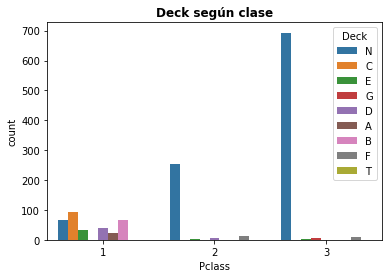

Deck,A,B,C,D,E,F,G,N,T
Pclass,,,,,,,,,
1,6.811146,20.123839,29.102167,12.383901,10.526316,0.000000,0.000000,20.743034,0.309598
2,0.000000,0.000000,0.000000,2.166065,1.444043,4.693141,0.000000,91.696751,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.423131,1.128350,0.705219,97.743300,0.000000


In [24]:
sns.countplot(x='Pclass', hue='Deck', data=titanic)
plt.title('Deck según clase', weight='bold')
plt.show()

table = pd.crosstab(titanic['Pclass'], titanic['Deck'], normalize='index')
table*100

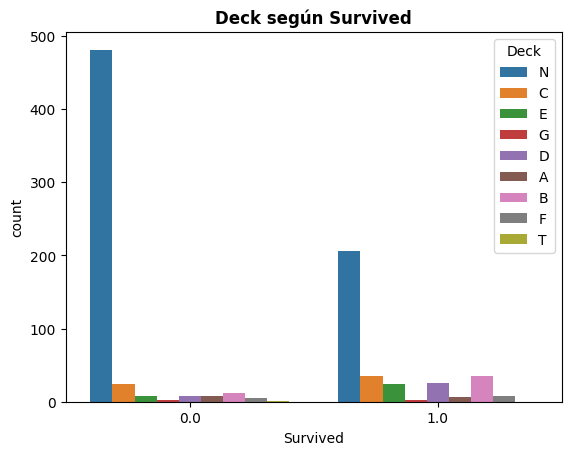

Deck,A,B,C,D,E,F,G,N,T
Survived,,,,,,,,,
0.0,8,12,24,8,8,5,2,481,1
1.0,7,35,35,25,24,8,2,206,0


In [26]:
sns.countplot(x='Survived', hue='Deck', data=titanic)
plt.title('Deck según Survived', weight='bold')
plt.show()

table = pd.crosstab(titanic['Survived'], titanic['Deck'])
table


### Indagamos sobre la variable Embarked

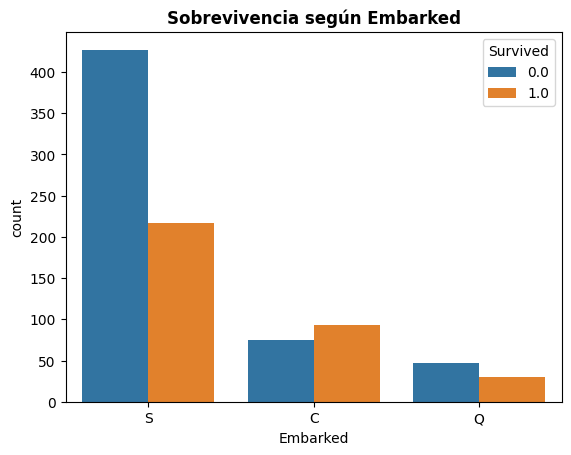

Survived,0.0,1.0
Embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.304348,33.695652


In [27]:
sns.countplot(x='Embarked', hue='Survived', data=titanic)
plt.title('Sobrevivencia según Embarked', weight='bold')
plt.show()

table = pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize='index')
table*100

### Indagamos sobre la edad

In [25]:
age_null = titanic[titanic.Age.isnull()]

Los de tercera clase son los que tienen la mayor cantidad de registros de edad perdido +  
el máximo de relaciones de padres/hijos 8 (parch) y máximo de esposo(a)/hermano 9

In [26]:
age_null.groupby('Pclass')[('SibSp','Parch')].describe()

C:\Users\cj_li\AppData\Local\Temp\ipykernel_16256\1580944037.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  age_null.groupby('Pclass')[('SibSp','Parch')].describe()


SibSp                                               Parch            \
        count      mean       std  min  25%  50%  75%  max  count      mean   
Pclass                                                                        
1        39.0  0.153846  0.365518  0.0  0.0  0.0  0.0  1.0   39.0  0.025641   
2        16.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   16.0  0.000000   
3       208.0  0.581731  1.607066  0.0  0.0  0.0  0.0  8.0  208.0  0.302885   

                                           
             std  min  25%  50%  75%  max  
Pclass                                     
1       0.160128  0.0  0.0  0.0  0.0  1.0  
2       0.000000  0.0  0.0  0.0  0.0  0.0  
3       1.058479  0.0  0.0  0.0  0.0  9.0

Veamos como se comporta la edad y la sobrevivencia.  
Para esto será necesario categorizar la edad.  
Se tiene 263 datos de edad perdidos, se tratarán por medio de imputación según el vecino más cercano

In [24]:
#Creamos 8 intervalos
rango = titanic['Age'].max() - titanic['Age'].min()
largo_intervalo = int(np.round(rango / 8))

In [25]:
#Calculamos los límites inferiores y superirores de los intervalos

limite_inferior = int(np.floor( titanic['Age'].min()))
limite_superior = int(np.floor( titanic['Age'].max()))

#Creamos la lista de intervalos
total_intervalos = [i for i in range(limite_inferior, limite_superior+largo_intervalo, largo_intervalo)]

In [26]:
total_intervalos

[0, 10, 20, 30, 40, 50, 60, 70, 80]

In [27]:
#Etiquetas de los intervalos
etiquetas_intervalos = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']

In [28]:
titanic['Age_intervalo'] = pd.cut(x=titanic['Age'], bins=total_intervalos, labels=etiquetas_intervalos, include_lowest=True)

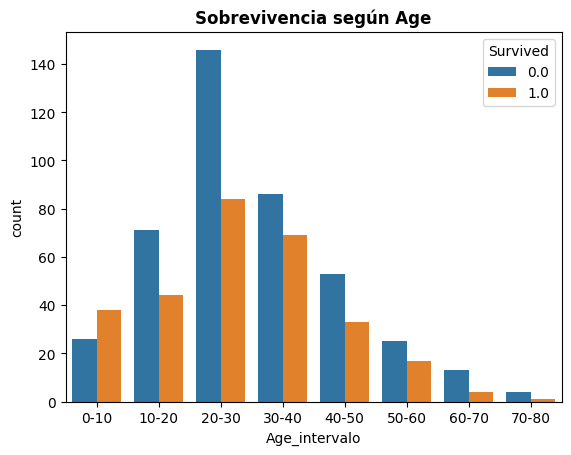

Survived,0.0,1.0
Age_intervalo,,
0-10,40.625000,59.375000
10-20,61.739130,38.260870
20-30,63.478261,36.521739
30-40,55.483871,44.516129
40-50,61.627907,38.372093
50-60,59.523810,40.476190
60-70,76.470588,23.529412
70-80,80.000000,20.000000


In [29]:
sns.countplot(x='Age_intervalo', hue='Survived', data=titanic)
plt.title('Sobrevivencia según Age', weight='bold')
plt.show()

table = pd.crosstab(titanic['Age_intervalo'], titanic['Survived'], normalize='index')
table*100

Ahora veremos como se relaciona la edad con la Clase

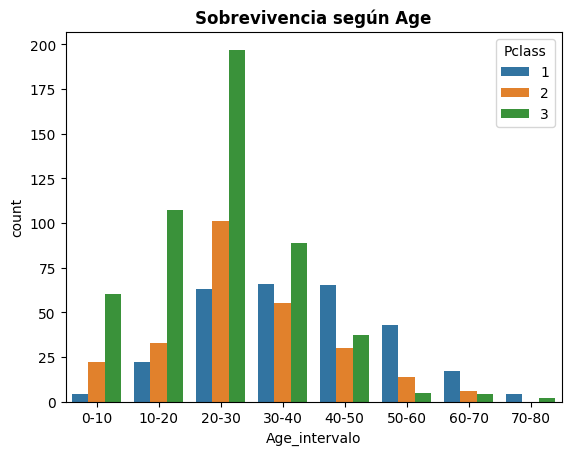

Pclass,1,2,3
Age_intervalo,,,
0-10,4.651163,25.581395,69.767442
10-20,13.580247,20.370370,66.049383
20-30,17.451524,27.977839,54.570637
30-40,31.428571,26.190476,42.380952
40-50,49.242424,22.727273,28.030303
50-60,69.354839,22.580645,8.064516
60-70,62.962963,22.222222,14.814815
70-80,66.666667,0.000000,33.333333


In [117]:
sns.countplot(x='Age_intervalo', hue='Pclass', data=titanic)
plt.title('Sobrevivencia según Age', weight='bold')
plt.show()

table = pd.crosstab(titanic['Age_intervalo'], titanic['Pclass'], normalize='index')
table*100

### Revisamos la variable Deck

<AxesSubplot: xlabel='Deck', ylabel='Age'>

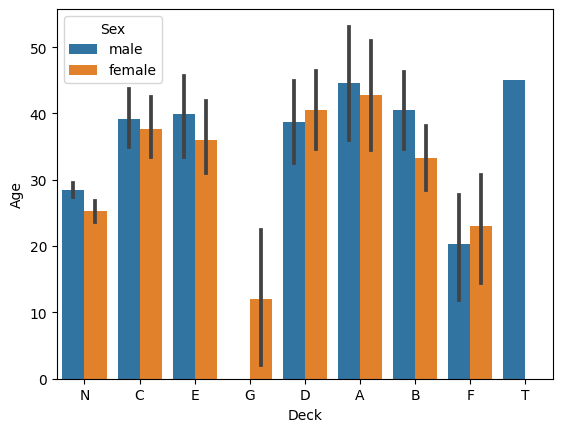

In [144]:
sns.barplot(x='Deck', y='Age', hue ='Sex', data=titanic)

In [29]:
titanic_2 = titanic.copy()

In [381]:
titanic = titanic_2.copy()

In [33]:
titanic_sin_N = titanic.query("Deck != 'N'")

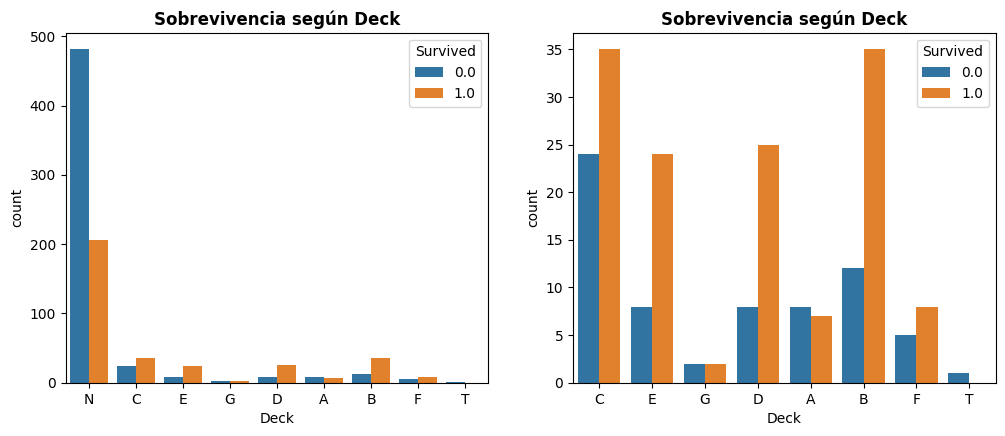

Survived,0.0,1.0
Deck,,
A,53.333333,46.666667
B,25.531915,74.468085
C,40.677966,59.322034
D,24.242424,75.757576
E,25.000000,75.000000
F,38.461538,61.538462
G,50.000000,50.000000
N,70.014556,29.985444
T,100.000000,0.000000


In [176]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.countplot(x='Deck', hue='Survived', data=titanic)
plt.title('Sobrevivencia según Deck', weight='bold')

plt.subplot(2,2,2)
sns.countplot(x='Deck', hue='Survived', data=titanic_sin_N)
plt.title('Sobrevivencia según Deck', weight='bold')

plt.show()

table = pd.crosstab(titanic['Deck'], titanic['Survived'], normalize='index')
table*100

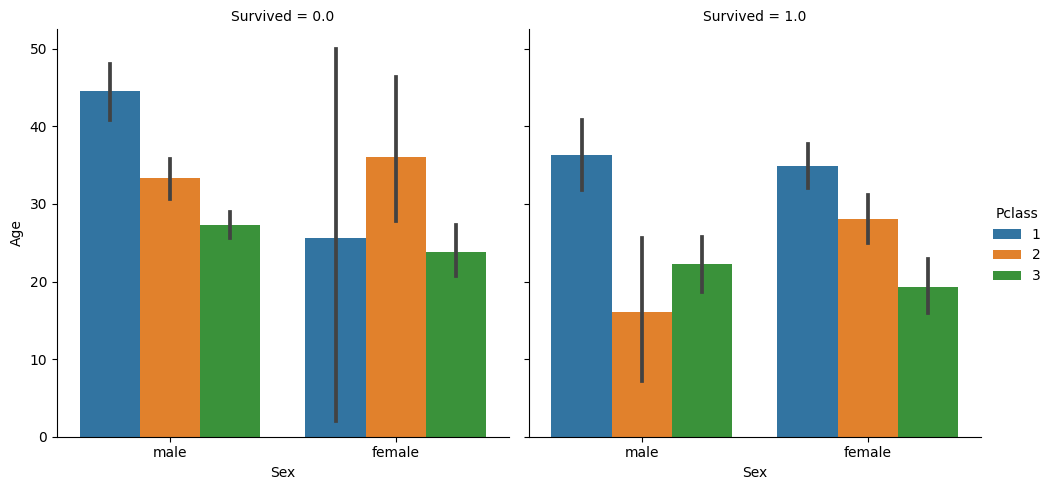

In [39]:
sns.catplot(x="Sex", y="Age", hue="Pclass", col="Survived", data=titanic, kind="bar")

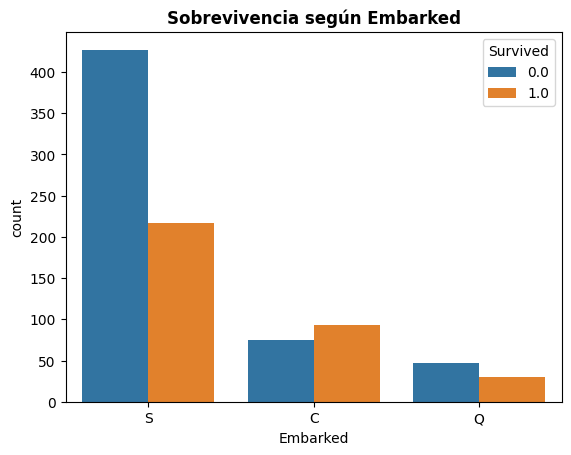

Survived,0.0,1.0
Embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.304348,33.695652


In [40]:
sns.countplot(x='Embarked', hue='Survived', data=titanic)
plt.title('Sobrevivencia según Embarked', weight='bold')
plt.show()

table = pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize='index')
table*100

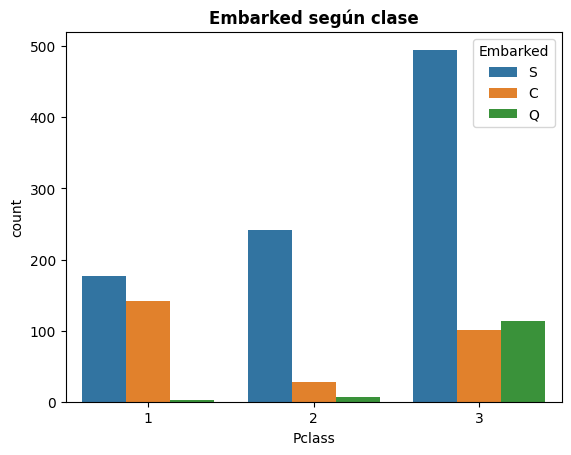

Embarked,C,Q,S
Pclass,,,
1,43.925234,0.934579,55.140187
2,10.108303,2.527076,87.364621
3,14.245416,15.937941,69.816643


In [41]:
sns.countplot(x='Pclass', hue='Embarked', data=titanic)
plt.title('Embarked según clase', weight='bold')
plt.show()

table = pd.crosstab(titanic['Pclass'], titanic['Embarked'], normalize='index')
table*100

Vemos como se comporta la supervivencia de las personas según tenian familia o venian solos

In [30]:
titanic.groupby(['Survived', 'SibSp', 'Parch'])['Survived'].count().unstack().fillna('-')

Parch               0     1     2    4    5    3    6
Survived SibSp                                       
0.0      0      374.0  13.0   8.0  1.0  2.0    -    -
         1       59.0  23.0   7.0  3.0  2.0  2.0  1.0
         2       12.0   1.0   2.0    -    -    -    -
         3          -   7.0   5.0    -    -    -    -
         4          -   9.0   6.0    -    -    -    -
         5          -     -   5.0    -    -    -    -
         8          -     -   7.0    -    -    -    -
1.0      0      163.0  25.0  21.0    -    -  1.0    -
         1       64.0  34.0  12.0    -  1.0  1.0    -
         2        4.0   6.0   2.0    -    -  1.0    -
         3        2.0     -   2.0    -    -    -    -
         4          -     -   3.0    -    -    -    -

Se crea la columna que indica si la persona tiene familia (1) o iba sola (0)

In [31]:
titanic['Family'] = np.where(((titanic['Parch'] > 0) & (titanic['SibSp'] > 0)), 1, 0)

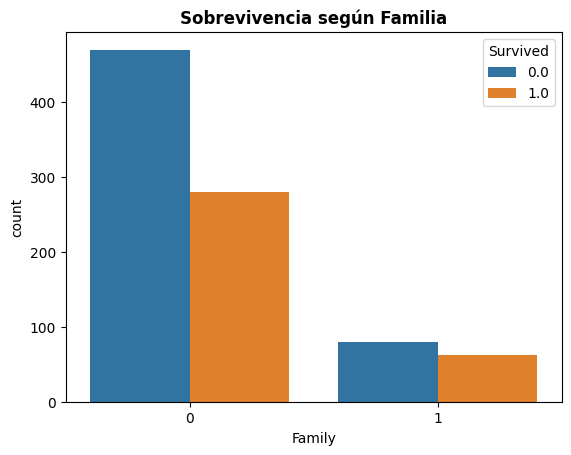

Survived,0.0,1.0
Family,,
0,0.626168,0.373832
1,0.563380,0.436620


In [44]:
sns.countplot(x='Family', hue='Survived', data=titanic)
plt.title('Sobrevivencia según Familia', weight='bold')
plt.show()

table = pd.crosstab(titanic['Family'], titanic['Survived'], normalize='index')
table

### Resumen del EDA mediante gráfica

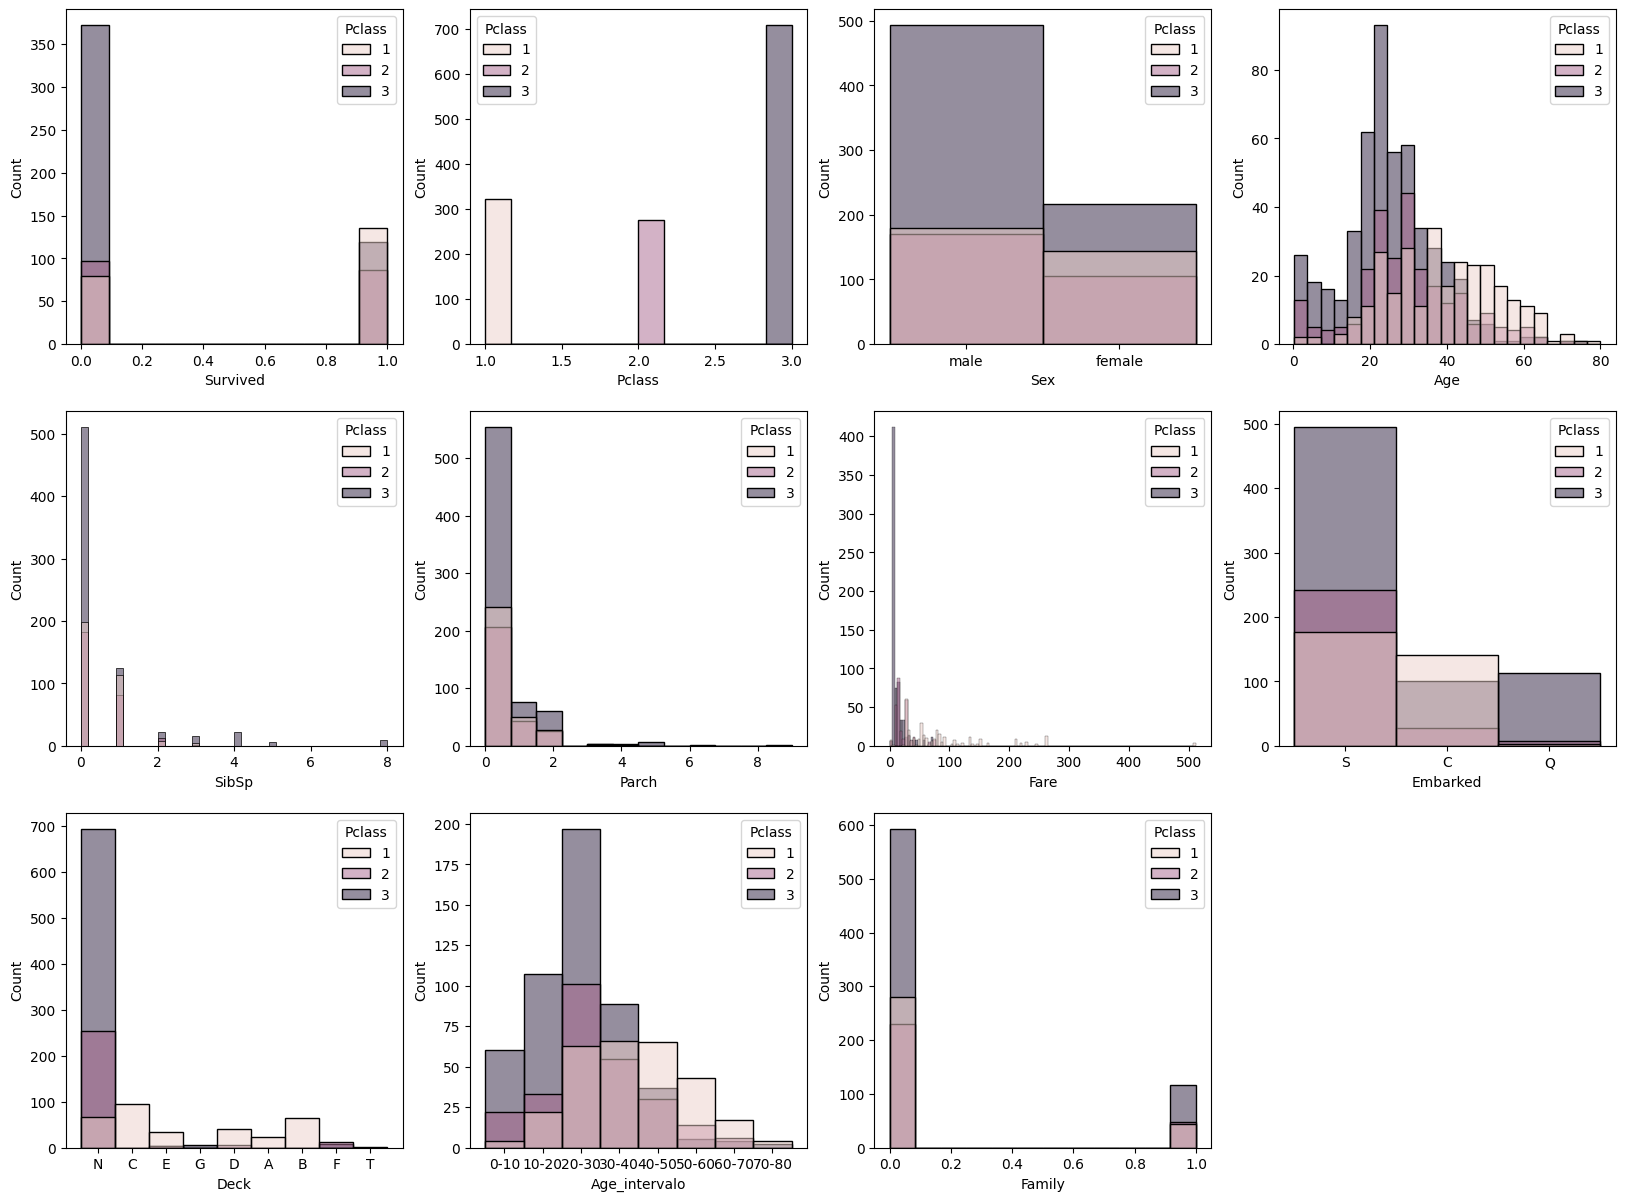

In [45]:
plt.figure(figsize=(20,20))
for i, v in enumerate(titanic):
    plt.subplot(4,4,i+1)
    sns.histplot(x = v , data = titanic, hue='Pclass')
    
plt.show()

### Tratamiento de MV

In [32]:
titanic.isnull().sum()

Survived         418
Pclass             0
Sex                0
Age              263
SibSp              0
Parch              0
Fare               1
Embarked           2
Deck               0
Age_intervalo    263
Family             0
dtype: int64

Se observa que la mayor cantidad de datos perdidos están en la variable Age, omitiendo la variable objetivo 'Survived'.  
Partiremos con la edad, primera aproximación, imputar la edad por el promedio de la clase

In [33]:
titanic.groupby('Pclass')['Age'].mean()

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [34]:
class_age = {1:39, 2:29, 3:25}

In [35]:
def fill_age(columns):
    age = columns[0]
    pclass = np.int64(columns[1])
    return class_age[pclass] if pd.isnull(age) else age

In [36]:
titanic['Age_median'] = titanic[['Age', 'Pclass']].apply(fill_age, axis=1)

Se observa que altera la curva de distribución

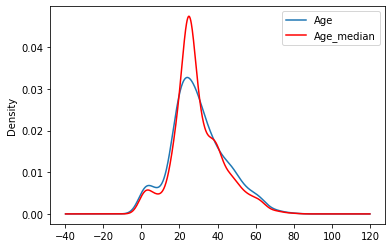

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)

titanic['Age'].plot(kind='kde', ax=ax)

titanic['Age_median'].plot(kind='kde', ax=ax, color='red')


lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Para imputar las variables faltantes, aplicaré una imputación según el vecino más cercano.  
El algoritmo trabaja con distancias, por lo tanto, es aplicar un encoder y estandarizar las variables.  
Primero imputamos las otras variables faltantes

In [37]:
#Fare según el promedio de la clase
titanic.groupby('Pclass')['Fare'].mean()

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [38]:
class_fare = {1:87.508992, 2:21.179196, 3:13.302889}

In [39]:
def fill_fare(columns):
    fare = columns[0]
    pclass = np.int64(columns[1])
    return class_fare[pclass] if pd.isnull(fare) else fare

In [40]:
titanic['Fare'] = titanic[['Fare', 'Pclass']].apply(fill_fare, axis=1)

In [41]:
titanic.groupby('Pclass')['Embarked'].describe()

,count,unique,top,freq
Pclass,,,,
1,321,3,S,177
2,277,3,S,242
3,709,3,S,495


In [42]:
#Embarked según el dato que ma´s se repite
titanic['Embarked']= titanic['Embarked'].fillna('S')

Antes de hacer el encoder, debemos aislar la variable objetivo

In [43]:
titanic_y = pd.DataFrame(titanic['Survived'])
titanic.drop(['Survived', 'Age_intervalo','SibSp','Parch','Age_median'], axis='columns',inplace=True)

### Aplicación de Encoder_1 con LabelEncoder

In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [45]:
titanic_cat = titanic.select_dtypes(include=['object', 'category'])

In [46]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','uint8']
titanic_num= titanic.select_dtypes(include=numerics)
print(titanic_num.shape)
titanic_num.head()

(1309, 4)


,Pclass,Age,Fare,Family
0,3,22.0,7.2500,0
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,0


In [47]:
labels_cat = preprocessing.LabelEncoder()
train_titanic_enc = titanic_cat.apply(labels_cat.fit_transform)
train_titanic_enc.head(5)

,Sex,Embarked,Deck
0,1,2,7
1,0,0,2
2,0,2,7
3,0,2,2
4,1,2,7


In [48]:
titanic_enc = pd.concat([titanic_num,train_titanic_enc], ignore_index=True, axis = 1)
titanic_enc.columns = titanic_num.columns.tolist() + titanic_cat.columns.tolist()
titanic_enc.head()

,Pclass,Age,Fare,Family,Sex,Embarked,Deck
0,3,22.0,7.2500,0,1,2,7
1,1,38.0,71.2833,0,0,0,2
2,3,26.0,7.9250,0,0,2,7
3,1,35.0,53.1000,0,0,2,2
4,3,35.0,8.0500,0,1,2,7


In [49]:
titanic_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Age       1046 non-null   float64
 2   Fare      1309 non-null   float64
 3   Family    1309 non-null   int32  
 4   Sex       1309 non-null   int32  
 5   Embarked  1309 non-null   int32  
 6   Deck      1309 non-null   int32  
dtypes: float64(2), int32(4), int64(1)
memory usage: 51.3 KB


### Alternativa, Enconder onehot

In [344]:
titanic[['class_1', 'class_2','class_3']] = pd.get_dummies(titanic['Pclass'])

In [345]:
titanic[['Embarked_S', 'Embarked_C','Embarked_Q']] = pd.get_dummies(titanic['Embarked'])

In [346]:
titanic[['Deck_N', 'Deck_C', 'Deck_E', 'Deck_G', 'Deck_D', 'Deck_A', 'Deck_B', 'Deck_F', 'Deck_T']] = pd.get_dummies(titanic['Deck'])

In [348]:
titanic['Sex'] = titanic['Sex'].replace({'male': 1, 'female': 0}).astype('category')

In [353]:
titanic.drop(['Embarked', 'Deck','Pclass'], axis='columns',inplace=True)

In [50]:
titanic.head()

,Pclass,Sex,Age,Fare,Embarked,Deck,Family
0,3,male,22.0,7.2500,S,N,0
1,1,female,38.0,71.2833,C,C,0
2,3,female,26.0,7.9250,S,N,0
3,1,female,35.0,53.1000,S,C,0
4,3,male,35.0,8.0500,S,N,0


In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler().fit(titanic_enc)
titanic_esc = pd.DataFrame(scaler.transform(titanic_enc))
titanic_esc.columns = titanic_enc.columns.tolist() 
titanic_esc.head()

,Pclass,Age,Fare,Family,Sex,Embarked,Deck
0,0.841916,-0.547050,-0.503271,-0.432161,0.743497,0.622279,0.507835
1,-1.546098,0.563552,0.734756,-0.432161,-1.344995,-1.834926,-1.923608
2,0.841916,-0.269400,-0.490220,-0.432161,-1.344995,0.622279,0.507835
3,-1.546098,0.355314,0.383198,-0.432161,-1.344995,0.622279,-1.923608
4,0.841916,0.355314,-0.487804,-0.432161,0.743497,0.622279,0.507835


In [58]:
titanic_esc.isnull().sum()

Pclass        0
Age         263
Fare          0
Family        0
Sex           0
Embarked      0
Deck          0
dtype: int64

### En este punto, probaré imputar los MV de edad por medio de KNNImputer

In [53]:
from sklearn.impute import KNNImputer

In [54]:
# Crear un imputador KNN
imputer = KNNImputer(n_neighbors=3, weights='distance', metric='nan_euclidean')

# Imputar los valores perdidos en los datos
titanic_imputed = imputer.fit_transform(titanic_esc)

In [55]:
titanic_imputed = pd.DataFrame(titanic_imputed, columns=titanic_esc.columns)

In [56]:
titanic_imputed['Age_original'] = titanic_esc['Age']

Se observa que la imputación no alteró demasiado la curva de distribución

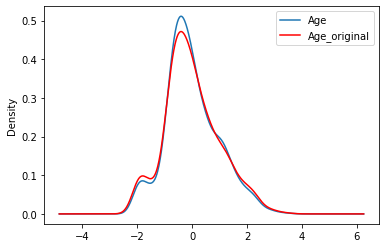

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)

titanic_imputed['Age'].plot(kind='kde', ax=ax)

titanic_imputed['Age_original'].plot(kind='kde', ax=ax, color='red')


lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## Modelamiento

### Separación de muestras

Separaré las muestras:  

En primer lugar almacenaré los datos con edad faltante y los trataré como datos target.  
Posteriormente, eliminaré los registros faltantes del dataframe prinpcipal y lo trataré como subdata, con la cual haré testeo y entrenamiento

In [57]:
titanic_imputed.drop(['Age_original'], axis='columns',inplace=True)

In [58]:
titanic = pd.concat([titanic_y,titanic_imputed], ignore_index=True, axis = 1)
columnas = list(titanic_y.columns) + list(titanic_imputed.columns)
titanic.columns = columnas

In [66]:
titanic.head()

,Survived,Pclass,Age,Fare,Family,Sex,Embarked,Deck
0,0.0,0.841916,-0.547050,-0.503271,-0.432161,0.743497,0.622279,0.507835
1,1.0,-1.546098,0.563552,0.734756,-0.432161,-1.344995,-1.834926,-1.923608
2,1.0,0.841916,-0.269400,-0.490220,-0.432161,-1.344995,0.622279,0.507835
3,1.0,-1.546098,0.355314,0.383198,-0.432161,-1.344995,0.622279,-1.923608
4,0.0,0.841916,0.355314,-0.487804,-0.432161,0.743497,0.622279,0.507835


In [59]:
titanic.isna().sum()

Survived    418
Pclass        0
Age           0
Fare          0
Family        0
Sex           0
Embarked      0
Deck          0
dtype: int64

In [96]:
titanic.to_csv('titanic.csv',index=False)

In [3]:
#Cargar el dataframe con el preprocesamiento listo
titanic =pd.read_csv('titanic.csv')

Preparar el test y train data

In [4]:
titanic_test = titanic[titanic.Survived.isnull()]
titanic_test = titanic_test.drop(['Survived'], axis='columns')
titanic_test.head()

,Pclass,Age,Fare,Family,Sex,Embarked,Deck
891,0.841916,0.320607,-0.492073,-0.432161,0.743497,-0.606323,0.507835
892,0.841916,1.188265,-0.508104,-0.432161,-1.344995,0.622279,0.507835
893,-0.352091,2.229454,-0.456144,-0.432161,0.743497,-0.606323,0.507835
894,0.841916,-0.199987,-0.475961,-0.432161,0.743497,0.622279,0.507835
895,0.841916,-0.547050,-0.405875,2.313951,-1.344995,0.622279,0.507835


In [5]:
titanic_train = titanic.dropna()

In [6]:
titanic_train_X = titanic_train.drop(['Survived'], axis='columns')
titanic_train_y = pd.DataFrame(titanic_train['Survived'])

In [7]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    float64
 1   Age       418 non-null    float64
 2   Fare      418 non-null    float64
 3   Family    418 non-null    float64
 4   Sex       418 non-null    float64
 5   Embarked  418 non-null    float64
 6   Deck      418 non-null    float64
dtypes: float64(7)
memory usage: 26.1 KB


### Se realizará una reducción de variables mediante componentes principales

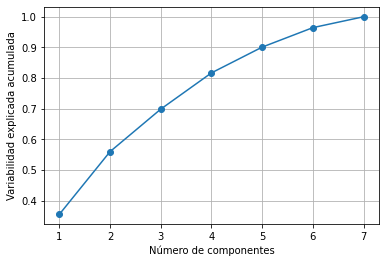

In [64]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as  plt
pca_model = PCA()
pca_model.fit(titanic_train_X)
plt.plot(range(1,8),pca_model.explained_variance_ratio_.cumsum(), marker = 'o')
plt.xlabel('Número de componentes')
plt.ylabel('Variabilidad explicada acumulada')
plt.grid()

Se hará el corte considerando explicar el 80% de los datos

In [65]:
pca_model = PCA(n_components = 4)
pca_model.fit(titanic_train_X)
pca_titanic_train_X = pd.DataFrame(pca_model.transform(titanic_train_X))
pca_titanic_train_X.head()

,0,1,2,3
0,-1.345684,-0.486433,0.185015,0.192068
1,3.099507,0.339156,-1.521890,-0.236233
2,-0.960993,0.417005,-0.490545,-1.452336
3,2.351414,0.135858,0.320296,-1.497491
4,-1.090445,-0.948594,0.309304,0.032971


## Probar modelos

### División de datos

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(titanic_train_X, titanic_train_y, test_size=0.2, random_state=2023)

In [ ]:
#Probar modelos con los PCA
train_X, test_X, train_y, test_y = train_test_split(pca_titanic_train_X, titanic_train_y, test_size=0.2, random_state=2023)

### Primer arpoach con RF

In [10]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
##para corregir el problema del vector objetivo
y_train = np.ravel(y_train)

In [12]:
#entrenamos el random forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

pred_values_rf = rf_model.predict(X_test)
print(classification_report(y_test,pred_values_rf))
print(confusion_matrix(y_test,pred_values_rf))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.88       113
         1.0       0.82      0.71      0.76        66

    accuracy                           0.84       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.84      0.84      0.84       179

[[103  10]
 [ 19  47]]


### Hacemos un ajuste de parámetros

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [100,500,1000],
    'max_depth' : [2,3,5,7,9,11,12],
    'max_features' : [2,3,4,5,6,7]
}

opt_rf_model = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, n_jobs = -1)
opt_rf_model.fit(X_train,y_train)
pred_values_rf = opt_rf_model.predict(X_test)

print(opt_rf_model.best_params_)
print(classification_report(y_test,pred_values_rf))
print(confusion_matrix(y_test,pred_values_rf))

{'max_depth': 7, 'max_features': 3, 'n_estimators': 100}
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89       113
         1.0       0.85      0.76      0.80        66

    accuracy                           0.86       179
   macro avg       0.86      0.84      0.85       179
weighted avg       0.86      0.86      0.86       179

[[104   9]
 [ 16  50]]


### Probaré otro ajuste de parámetros con hyperopt

In [14]:
from sklearn.model_selection import cross_val_score
from hyperopt import fmin, tpe, hp, Trials

In [15]:
# Define objective function
def objective_function(parameters):
    # Initiate RandomForestRegressor
    regressor = RandomForestClassifier(**parameters)
    
    # Calculate the mean cross-validation score using 5 folds
    score = cross_val_score(regressor, X_train, y_train, cv=5).mean()
    
    return -score

# Define search Space
search_space = {
    'n_estimators': hp.choice('n_estimators', range(10, 1000)),
    'max_depth': hp.choice('max_depth', range(1, 30)),
}

In [16]:
# Trials object to store the results
trials = Trials()

# Run optimization
best = fmin(fn=objective_function, space=search_space, algo=tpe.suggest, trials=trials, max_evals=100)
print(best)

100%|██████████| 100/100 [07:03<00:00,  4.24s/trial, best loss: -0.8244656751699004]
{'max_depth': 12, 'n_estimators': 743}


In [17]:
rf_hopt = RandomForestClassifier(**best)
rf_hopt.fit(X_train,y_train)
pred_values_rf = rf_hopt.predict(X_test)

print(classification_report(y_test,pred_values_rf))
print(confusion_matrix(y_test,pred_values_rf))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.88       113
         1.0       0.82      0.71      0.76        66

    accuracy                           0.84       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.84      0.84      0.84       179

[[103  10]
 [ 19  47]]


### Optimización mendiante Randomized Search

In [84]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

In [87]:

param_grid = {
    'n_estimators' : randint(100, 1000),
    'max_depth' : randint(2, 30),
    'max_features' : randint(2,7)
}
# Realizar la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter=100, cv=5,scoring='precision',n_jobs=-2,random_state=2023)
random_search.fit(X_train,y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

Mejores hiperparámetros encontrados:
{'max_depth': 4, 'max_features': 3, 'n_estimators': 177}


In [86]:
random_rf_model = RandomForestClassifier(**random_search.best_params_)
random_rf_model.fit(X_train,y_train)
pred_values_rf = random_rf_model.predict(X_test)

print(random_search.best_params_)
print(classification_report(y_test,pred_values_rf))
print(confusion_matrix(y_test,pred_values_rf))

{'max_depth': 2, 'max_features': 2, 'n_estimators': 709}
              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83       113
         1.0       0.76      0.53      0.62        66

    accuracy                           0.77       179
   macro avg       0.76      0.72      0.73       179
weighted avg       0.76      0.77      0.75       179

[[102  11]
 [ 31  35]]


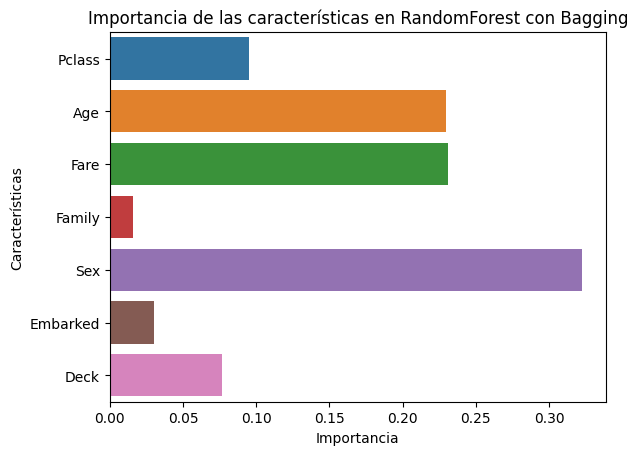

In [80]:
# Obtener la importancia de las caracteristicas en el modelo.

feature_importance = opt_rf_model.best_estimator_.feature_importances_

# Crear un gráfico de barras de la importancia de las características
sns.barplot(x=feature_importance, y=X_train.columns)
plt.title('Importancia de las características en RandomForest con Bagging')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

### Extra Tree Classifier

In [177]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

In [178]:
ex_tree_model = ExtraTreesClassifier()
ex_tree_model.fit(X_train, y_train)
pred_values_ex_tree = ex_tree_model.predict(X_test)
print(classification_report(y_test,pred_values_ex_tree))
print(confusion_matrix(y_test,pred_values_ex_tree))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       113
         1.0       0.79      0.68      0.73        66

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179

[[101  12]
 [ 21  45]]


In [179]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [100,500,1000],
    'max_depth' : [2,3,5,7,9,11,12],
    'max_features' : [2,3,4,5,6,7]
}

opt_ex_tree_model = GridSearchCV(ExtraTreesClassifier(), param_grid = param_grid, n_jobs = -1)
opt_ex_tree_model.fit(X_train,y_train)
pred_values_ex_tree = opt_ex_tree_model.predict(X_test)

print(opt_ex_tree_model.best_params_)
print(classification_report(y_test,pred_values_ex_tree))
print(confusion_matrix(y_test,pred_values_ex_tree))

{'max_depth': 11, 'max_features': 7, 'n_estimators': 100}
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87       113
         1.0       0.83      0.68      0.75        66

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179

[[104   9]
 [ 21  45]]


### Segundo arpoach con árboles decisión

In [110]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
pred_values_tree = tree_model.predict(X_test)
print(classification_report(y_test,pred_values_tree))
print(confusion_matrix(y_test,pred_values_tree))

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83       113
         1.0       0.73      0.68      0.70        66

    accuracy                           0.79       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179

[[96 17]
 [21 45]]


### Tercer aproach con ADA

In [111]:
from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=7), n_estimators=100, algorithm='SAMME.R', learning_rate= 0.5)
ab_model.fit(X_train, y_train)

pred_values_ab = ab_model.predict(X_test)
print(classification_report(y_test,pred_values_ab))
print(confusion_matrix(y_test,pred_values_ab))

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       113
         1.0       0.73      0.67      0.70        66

    accuracy                           0.79       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.79      0.79       179

[[97 16]
 [22 44]]


### 4. GBM

In [112]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)

pred_values_gbm = gbm_model.predict(X_test)
print(classification_report(y_test,pred_values_gbm))
print(confusion_matrix(y_test,pred_values_gbm))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86       113
         1.0       0.78      0.70      0.74        66

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179

[[100  13]
 [ 20  46]]


In [113]:
# Otro método de optimizar hiper-parámetros
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [115]:
param_dist = {'learning_rate': sp_randFloat(),
                'n_estimators' : sp_randInt(100, 1000),
                'max_depth': sp_randInt(2,12)
             }

opt_gbm_model = RandomizedSearchCV(estimator=GradientBoostingClassifier(), param_distributions = param_dist, cv = 5, scoring='precision', n_iter= 300,n_jobs=-1)
opt_gbm_model.fit(X_train,y_train)
pred_values_gbm = opt_gbm_model.predict(X_test)

print(opt_gbm_model.best_params_)
print(classification_report(y_test,pred_values_gbm))
print(confusion_matrix(y_test,pred_values_gbm))

{'learning_rate': 0.0014448195071513625, 'max_depth': 2, 'n_estimators': 221}
              precision    recall  f1-score   support

         0.0       0.76      0.99      0.86       113
         1.0       0.97      0.45      0.62        66

    accuracy                           0.79       179
   macro avg       0.86      0.72      0.74       179
weighted avg       0.83      0.79      0.77       179

[[112   1]
 [ 36  30]]


### 5. XGBoost

In [18]:
from xgboost import XGBClassifier

In [19]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

pred_values_xgb = xgb_model.predict(X_test)
print(classification_report(y_test,pred_values_xgb))
print(confusion_matrix(y_test,pred_values_xgb))

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87       113
         1.0       0.79      0.73      0.76        66

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179

[[100  13]
 [ 18  48]]


### 5.1 Ajuste con búsqueda aleatoria de parámetros

In [22]:
param_dist = {'learning_rate': sp_randFloat(),
                'n_estimators' : sp_randInt(10, 1000),
                'max_depth': sp_randInt(2,12)
             }

opt_xgb_model = RandomizedSearchCV(estimator=XGBClassifier(), param_distributions = param_dist, cv = 10, scoring='precision',n_jobs=-2,random_state=2023, n_iter= 100)
opt_xgb_model.fit(X_train,y_train)
pred_values_xgb = opt_xgb_model.predict(X_test)

print(opt_xgb_model.best_params_)
print(classification_report(y_test,pred_values_xgb))
print(confusion_matrix(y_test,pred_values_xgb))

{'learning_rate': 0.058478765149738376, 'max_depth': 6, 'n_estimators': 81}
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       113
         1.0       0.84      0.74      0.79        66

    accuracy                           0.85       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179

[[104   9]
 [ 17  49]]


### 5.2 XGBoost con búsqueda exhaustiva de parámetros  
Tardó 735 minutos!

In [97]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : range(100, 1000),
    'max_depth' : range(2, 20),
    'max_features' : [2,3,4,5,6,7]
}

opt_xgb_grid = GridSearchCV(XGBClassifier(), param_grid = param_grid, cv = 5, n_jobs = -1, scoring='precision')
opt_xgb_grid.fit(train_X,train_y)
pred_values_rf = opt_xgb_grid.predict(test_X)

print(opt_xgb_grid.best_params_)
print(classification_report(test_y,pred_values_rf))
print(confusion_matrix(test_y,pred_values_rf))

[21:56:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_features" } are not used.

{'max_depth': 2, 'max_features': 2, 'n_estimators': 140}
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87       113
         1.0       0.79      0.74      0.77        66

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

[[100  13]
 [ 17  49]]


In [98]:
probabilities = opt_xgb_grid.predict_proba(test_X)

In [99]:
for i in range(len(probabilities)):
    prob_class_0 = probabilities[i, 0]
    prob_class_1 = probabilities[i, 1]
    print(f"Probabilidades para la instancia {i}: Clase 0={prob_class_0}, Clase 1={prob_class_1}")

Probabilidades para la instancia 0: Clase 0=0.8771013617515564, Clase 1=0.12289862334728241
Probabilidades para la instancia 1: Clase 0=0.3162025809288025, Clase 1=0.6837974190711975
Probabilidades para la instancia 2: Clase 0=0.9722892045974731, Clase 1=0.02771078795194626
Probabilidades para la instancia 3: Clase 0=0.8105996251106262, Clase 1=0.18940035998821259
Probabilidades para la instancia 4: Clase 0=0.126350998878479, Clase 1=0.873649001121521
Probabilidades para la instancia 5: Clase 0=0.03869706392288208, Clase 1=0.9613029360771179
Probabilidades para la instancia 6: Clase 0=0.9941216111183167, Clase 1=0.005878406576812267
Probabilidades para la instancia 7: Clase 0=0.26052141189575195, Clase 1=0.739478588104248
Probabilidades para la instancia 8: Clase 0=0.9467071890830994, Clase 1=0.053292810916900635
Probabilidades para la instancia 9: Clase 0=0.3762347102165222, Clase 1=0.6237652897834778
Probabilidades para la instancia 10: Clase 0=0.17471754550933838, Clase 1=0.82528245

Probaré con un punto de corte personalizado  
thresold = 0.5725

In [121]:
threshold = 0.5725

In [122]:
predicted_labels = (probabilities[:, 1] >= threshold).astype(int)

In [123]:
print(classification_report(test_y,predicted_labels))
print(confusion_matrix(test_y,predicted_labels))

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       113
         1.0       0.84      0.70      0.76        66

    accuracy                           0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179

[[104   9]
 [ 20  46]]


### 5.3 XGBoost con optimización con hyperopt

In [69]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe,space_eval

https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning

In [99]:
space={'max_depth': hp.quniform("max_depth", 2, 15, 1),
        'gamma': hp.uniform ('gamma', 1,9), # Controla la poda : mínima ganancia requerida para realizar una partición adicional en un nodo hoja
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1), #Regularización L1 del tipo Lasso
        'reg_lambda' : hp.uniform('reg_lambda', 0,1), #Regularización L2 Ridge
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1), #Regula la proporción de columnas que se utiliza al construir cada árbol
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1), #Controla la cantidad mínima de peso necesario en una hoja para continuar dividiéndola (peso es la suma de valores de muestra asociados con esa hoja)
        'n_estimators': hp.choice('n_estimators', range(10, 1000)),
        'seed': 2023
    }

In [ ]:
def objective(space):
    clf = XGBClassifier(
        n_estimators=space['n_estimators'],
        max_depth=int(space['max_depth']),
        gamma=space['gamma'],
        reg_alpha=int(space['reg_alpha']),
        min_child_weight=int(space['min_child_weight']),
        colsample_bytree=space['colsample_bytree']
    )

    evaluation = [(X_train, y_train), (X_test, y_test)]

    clf.fit(
        X_train, y_train,
        eval_set=evaluation, eval_metric="auc",
        early_stopping_rounds=10, verbose=False
    )

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred > 0.5)
    print("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK}

In [24]:
space={'max_depth': hp.quniform("max_depth", 2, 15, 1),
        'gamma': hp.uniform ('gamma', 1,20), 
        'min_child_weight' : hp.quniform('min_child_weight', 0, 20, 1), 
        'learning_rate':hp.uniform('learning_rate', 0.01, 10),
        'n_estimators': hp.choice('n_estimators', range(10, 1000)),
        'seed': 2023
    }

In [26]:
def objective(space):
    clf = XGBClassifier(
        n_estimators=space['n_estimators'],
        max_depth=int(space['max_depth']),
        gamma=space['gamma'],
        learning_rate=space['learning_rate'],
        min_child_weight=int(space['min_child_weight'])
    )

    evaluation = [(X_train, y_train), (X_test, y_test)]

    clf.fit(
        X_train, y_train,
        eval_set=evaluation, eval_metric="auc",
        early_stopping_rounds=10, verbose=False
    )

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred > 0.5)
    print("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK}


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 200,
                        trials = trials)

In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

In [ ]:
best_hyperparams['max_depth'] = int(best_hyperparams['max_depth'])
xgb_hyopt = XGBClassifier(**best_hyperparams)
xgb_hyopt.fit(X_train,y_train)
pred_values_xgb_hyopt = xgb_hyopt.predict(X_test)

print(classification_report(y_test,pred_values_xgb_hyopt))
print(confusion_matrix(y_test,pred_values_xgb_hyopt))

### Otra Forma

In [65]:
space={'max_depth': hp.choice('max_depth', range(2,15)),
        'gamma': hp.choice('gamma', [i/10.0 for i in range(0,5)]),
        'colsample_bytree' : hp.choice('colsample_bytree', [i/10.0 for i in range(3,10)]),
        'reg_alpha' : hp.choice('reg_alpha', [1e-5, 1e-2, 0.1, 1, 10, 100]),
        'reg_lambda' : hp.choice('reg_lambda', [1e-5, 1e-2, 0.1, 1, 10, 100]),
        'learning_rate':hp.uniform('learning_rate', 0.001, 1),
        'n_estimators': hp.choice('n_estimators', range(10, 1000)),
        'seed': 2023
    }

In [51]:
from sklearn.model_selection import StratifiedKFold

In [55]:
kfold =StratifiedKFold(n_splits=3, shuffle=True, random_state=2023)

In [99]:
# Objective function
def objective(params):
    
    xgboost = XGBClassifier(**params)
    score = cross_val_score(estimator=xgboost, 
                            X=X_train, 
                            y=y_train, 
                            cv=kfold, 
                            scoring='precision', 
                            n_jobs=-1).mean()
        # Loss is negative score
    loss = - score
    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'status': STATUS_OK}

In [100]:
# Optimize
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 200, trials = Trials())

100%|██████████| 200/200 [00:49<00:00,  4.06trial/s, best loss: -0.8429516719839301]


In [101]:
# Print the index of the best parameters
print(best)

{'colsample_bytree': 6, 'gamma': 3, 'learning_rate': 0.7907380602140096, 'max_depth': 12, 'n_estimators': 971, 'reg_alpha': 4, 'reg_lambda': 2}


In [102]:
# Print the values of the best parameters
print(space_eval(space, best))

{'colsample_bytree': 0.9, 'gamma': 0.3, 'learning_rate': 0.7907380602140096, 'max_depth': 14, 'n_estimators': 981, 'reg_alpha': 10, 'reg_lambda': 0.1, 'seed': 2023}


In [103]:
xgboost_bo = XGBClassifier(colsample_bytree=space_eval(space, best)['colsample_bytree'], 
                           gamma=space_eval(space, best)['gamma'], 
                           learning_rate=space_eval(space, best)['learning_rate'], 
                           max_depth=space_eval(space, best)['max_depth'], 
                           reg_alpha=space_eval(space, best)['reg_alpha'],
                           reg_lambda=space_eval(space, best)['reg_lambda']
                           ).fit(X_train,y_train)

In [104]:
from sklearn.metrics import precision_recall_fscore_support as score

In [106]:
# Make prediction using the best model
bayesian_opt_predict = xgboost_bo.predict(X_test)
# Get predicted probabilities
bayesian_opt_predict_prob = xgboost_bo.predict_proba(X_test)[:,1]
# Get performance metrics
precision, recall, fscore, support = score(y_test, bayesian_opt_predict)
# Print result
print(f'The precision value for the xgboost Bayesian optimization is {precision[1]:.4f}')

The precision value for the xgboost Bayesian optimization is 0.7759


In [107]:
print(classification_report(y_test,bayesian_opt_predict))
print(confusion_matrix(y_test,bayesian_opt_predict))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       113
         1.0       0.78      0.68      0.73        66

    accuracy                           0.81       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179

[[100  13]
 [ 21  45]]


In [ ]:
import matplotlib.pyplot as plt
import graphviz
from xgboost import plot_tree


plt.figure(figsize=(12, 8))
plot_tree(xgb_hyopt, num_trees=0)
plt.show()

### 5.2 XGBoost con detención temprana

In [50]:
xgbed_model = XGBClassifier()
xgbed_model.fit(X_train, y_train, eval_set = [(X_test, y_test)], early_stopping_rounds = 2)

pred_values_xgbed = xgbed_model.predict(X_test)
print(classification_report(y_test,pred_values_xgb))
print(confusion_matrix(y_test,pred_values_xgbed))

[0]	validation_0-logloss:0.57204
[1]	validation_0-logloss:0.50637
[2]	validation_0-logloss:0.47004
[3]	validation_0-logloss:0.44190
[4]	validation_0-logloss:0.41857
[5]	validation_0-logloss:0.40823
[6]	validation_0-logloss:0.40094
[7]	validation_0-logloss:0.39819
[8]	validation_0-logloss:0.39210
[9]	validation_0-logloss:0.39267
[10]	validation_0-logloss:0.39400
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       113
         1.0       0.84      0.74      0.79        66

    accuracy                           0.85       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179

[[103  10]
 [ 17  49]]


### Ensamblaje de modelos

In [91]:
#Ensamble de modelos 1
from sklearn.ensemble import VotingClassifier

# Crear una lista de modelos

models = [('Random Forest',opt_rf_model.best_estimator_),
         ('XGBOOST', opt_xgb_model.best_estimator_),
         ]

# Crear un modelo de Ensamble

ensemble_titanic_1 = VotingClassifier(models, voting='hard')

In [114]:
xgb_hyopt

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=4.68270416215934, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=1.153526598312879, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=9.0, missing=nan, monotone_constraints=None,
              n_estimators=182, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [30]:
#Ensamble de modelos 2
from sklearn.ensemble import VotingClassifier

# Crear una lista de modelos

models = [('Random Forest',opt_rf_model.best_estimator_),
         ('XGBOOST', xgb_hyopt),
         ]

# Crear un modelo de Ensamble

ensemble_titanic_2 = VotingClassifier(models, voting='hard')

In [31]:
ensemble_titanic_2.fit(X_train,y_train)

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(max_depth=7,
                                                     max_features=3)),
                             ('XGBOOST',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=2.6323212204226616,
                                            gpu_...cy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.8232180821051025,
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=12,
                                            max_leaves=None,
                                            min_child_weight=3.0, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=908, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))])

In [32]:
y_pred_ensemble_2 = ensemble_titanic_2.predict(X_test)
print(classification_report(y_test,y_pred_ensemble_2))
print(confusion_matrix(y_test,y_pred_ensemble_2))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       113
         1.0       0.88      0.74      0.80        66

    accuracy                           0.87       179
   macro avg       0.87      0.84      0.85       179
weighted avg       0.87      0.87      0.86       179

[[106   7]
 [ 17  49]]


In [180]:
#Ensamble de modelos 3
from sklearn.ensemble import VotingClassifier

# Crear una lista de modelos

models = [('Random Forest',opt_rf_model.best_estimator_),
         ('XGBOOST', xgboost_bo),
          ('GBM', opt_ex_tree_model.best_estimator_)
         ]

# Crear un modelo de Ensamble

ensemble_titanic_3 = VotingClassifier(models, voting='hard')

In [181]:
ensemble_titanic_3.fit(X_train,y_train)

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(max_depth=7,
                                                     max_features=3)),
                             ('XGBOOST',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.9,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0.3,
                                            gpu_id=None, grow_pol...
                                            learning_rate=0.7907380602140096,
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=14,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('GBM',
                              ExtraTreesClassifier(max_depth=11,
                                                   max_features=7))])

In [182]:
y_pred_ensemble_3 = ensemble_titanic_3.predict(X_test)
print(classification_report(y_test,y_pred_ensemble_3))
print(confusion_matrix(y_test,y_pred_ensemble_3))

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       113
         1.0       0.83      0.73      0.77        66

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

[[103  10]
 [ 18  48]]


In [183]:
# Obtén la lista de modelos base
modelos_base = ensemble_titanic_3.estimators_

In [184]:
# Crear un diccionario para almacenar las clasificaciones individuales
clasificaciones = {}

# Itera sobre los modelos base y realiza la clasificación individual
for i, modelo in enumerate(modelos_base):
    clasificacion_individual = modelo.predict(X_test)  # X_test es tu conjunto de prueba
    clasificaciones[f"Modelo {i+1}"] = clasificacion_individual

# Crea un DataFrame a partir del diccionario de clasificaciones
df_clasificaciones = pd.DataFrame(clasificaciones)

# Muestra el DataFrame
print(df_clasificaciones)

     Modelo 1  Modelo 2  Modelo 3
0           0         0         0
1           1         1         1
2           0         0         0
3           0         0         0
4           1         1         1
5           1         1         0
6           0         0         0
7           0         0         0
8           0         0         0
9           0         1         0
10          1         1         1
11          1         1         1
12          0         0         0
13          0         1         0
14          0         0         0
15          1         1         1
16          1         1         0
17          0         0         0
18          0         0         0
19          0         0         0
20          0         0         0
21          1         1         0
22          0         0         0
23          1         1         1
24          1         0         1
25          0         0         0
26          1         0         1
27          0         0         0
28          0 

In [185]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 840 to 542
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  179 non-null    float64
dtypes: float64(1)
memory usage: 6.9 KB


In [186]:
y_predichos = pd.DataFrame(y_pred_ensemble_3)
columnas = ['Survived_predichos']
y_predichos.columns = columnas

In [188]:
result = pd.concat([df_clasificaciones, y_predichos, y_test.reset_index(drop=True),], axis=1)
result.head(100)

,Modelo 1,Modelo 2,Modelo 3,Survived_predichos,Survived
0,0,0,0,0.0,0.0
1,1,1,1,1.0,1.0
2,0,0,0,0.0,0.0
3,0,0,0,0.0,0.0
4,1,1,1,1.0,1.0
5,1,1,0,1.0,1.0
6,0,0,0,0.0,0.0
7,0,0,0,0.0,0.0
8,0,0,0,0.0,0.0
9,0,1,0,0.0,1.0


### Guardar y cargar el modelo entrenado

In [33]:
from joblib import dump, load

# Guardar el modelo en un archivo
dump(ensemble_titanic_2, 'ensemble_titanic_2.joblib')

['ensemble_titanic_2.joblib']

In [92]:
from joblib import dump, load

# Guardar el modelo en un archivo
dump(ensemble_titanic_1, 'ensemble_titanic_1.joblib')



['ensemble_titanic_1.joblib']

In [ ]:
# Cargar el modelo desde el archivo
ensemble_titanic_1 = load('ensemble_titanic_1.joblib')

### Probaré realizar un Pipeline que optimiza el modelo mediante la reducción de variables con K-Means

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [95]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("ensembled_1", ensemble_titanic_1)])
pipeline.fit(train_X, train_y)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('ensembled_1',
                 VotingClassifier(estimators=[('Random Forest',
                                               RandomForestClassifier(max_depth=9,
                                                                      max_features=4,
                                                                      n_estimators=500)),
                                              ('XGBOOST',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             early_stopping_round...
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.0710375755753464,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=3,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=403,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             predictor=None,
                                                             random_state=None, ...))]))])

In [96]:
y_pipeline_ensamble = pipeline.predict(test_X)

In [97]:
print(classification_report(test_y,y_pipeline_ensamble))
print(confusion_matrix(test_y,y_pipeline_ensamble))

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       113
         1.0       0.76      0.67      0.71        66

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179

[[99 14]
 [22 44]]


In [98]:
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=5, verbose=2)
grid_clf.fit(train_X, train_y)

Fitting 5 folds for each of 98 candidates, totalling 490 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   1.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.9s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.9s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.8s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.8s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.9s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.9s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.9s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.9s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.9s
[CV] END ...............................kmeans__n_clusters=4; total time=   1.0s
[CV] END ...............................kmeans_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('ensembled_1',
                                        VotingClassifier(estimators=[('Random '
                                                                      'Forest',
                                                                      RandomForestClassifier(max_depth=9,
                                                                                             max_features=4,
                                                                                             n_estimators=500)),
                                                                     ('XGBOOST',
                                                                      XGBClassifier(base_score=None,
                                                                                    booster=None,
                                                                                    callbacks=None,
                                                                                    colsample_bylevel=None,
                                                                                    colsample_bynode=None,
                                                                                    colsample_by...
                                                                                    learning_rate=0.0710375755753464,
                                                                                    max_bin=None,
                                                                                    max_cat_threshold=None,
                                                                                    max_cat_to_onehot=None,
                                                                                    max_delta_step=None,
                                                                                    max_depth=3,
                                                                                    max_leaves=None,
                                                                                    min_child_weight=None,
                                                                                    missing=nan,
                                                                                    monotone_constraints=None,
                                                                                    n_estimators=403,
                                                                                    n_jobs=None,
                                                                                    num_parallel_tree=None,
                                                                                    predictor=None,
                                                                                    random_state=None, ...))]))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [99]:
y_pipeline_ensamble = grid_clf.predict(test_X)
print(classification_report(test_y,y_pipeline_ensamble))
print(confusion_matrix(test_y,y_pipeline_ensamble))

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       113
         1.0       0.76      0.67      0.71        66

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179

[[99 14]
 [22 44]]


In [257]:
ensemble_titanic_1.fit(train_X,train_y)

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(max_depth=7,
                                                     max_features=6,
                                                     n_estimators=500)),
                             ('XGBOOST',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            g...cy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.09179892894746888,
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=93, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))])

In [258]:
y_pred_ensemble = ensemble_titanic_1.predict(test_X)

In [259]:
print(classification_report(test_y,y_pred_ensemble))
print(confusion_matrix(test_y,y_pred_ensemble))

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89       113
         1.0       0.87      0.70      0.77        66

    accuracy                           0.85       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179

[[106   7]
 [ 20  46]]


In [288]:
#Ensamble de modelos votos soft
from sklearn.ensemble import VotingClassifier

# Crear una lista de modelos

models = [('Random Forest',opt_rf_model.best_estimator_),
         ('XGBOOST', opt_xgb_model.best_estimator_),
         ]

# Crear un modelo de Ensamble

ensemble_soft = VotingClassifier(models, voting='soft') #'hard' cuenta votos de cada clasificador de ensamble, soft calcula la probabilidad de clase estimada media para cada clase y escoge la clase con probabilidad más alta

In [289]:
ensemble_soft.fit(train_X,train_y)

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(max_depth=7,
                                                     max_features=6,
                                                     n_estimators=500)),
                             ('XGBOOST',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            g...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.0710375755753464,
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=403, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))],
                 voting='soft')

In [290]:
y_pred_ensemble_soft = ensemble_soft.predict(test_X)
print(classification_report(test_y,y_pred_ensemble_soft))
print(confusion_matrix(test_y,y_pred_ensemble_soft))

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       113
         1.0       0.82      0.74      0.78        66

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

[[102  11]
 [ 17  49]]


In [263]:
# Obtener el score del modelo ensemble en el conjunto de prueba
ensemble_score = accuracy_score(test_y, y_pred_ensemble)
print('Score del modelo ensemble en el conjunto de prueba:', ensemble_score)

Score del modelo ensemble en el conjunto de prueba: 0.8491620111731844


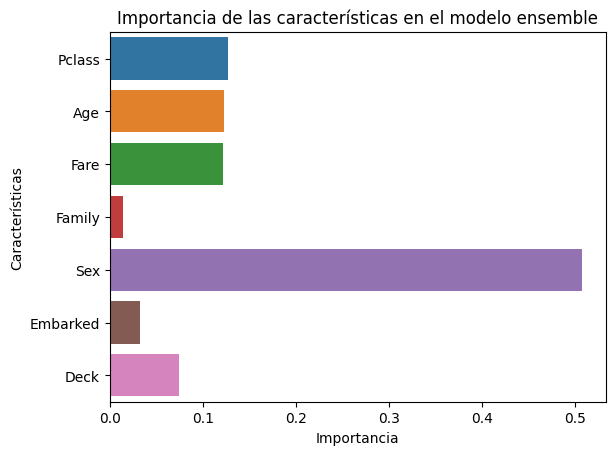

In [265]:
# Obtener la importancia de las características en el modelo ensemble
ensemble_feature_importance = np.mean([model[1].feature_importances_ for model in models], axis=0)

# Crear un gráfico de barras de la importancia de las características en el modelo ensemble
sns.barplot(x=ensemble_feature_importance, y=train_X.columns)
plt.title('Importancia de las características en el modelo ensemble')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

In [194]:
from sklearn import metrics

c:\Users\cj_li\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 600x600 with 0 Axes>

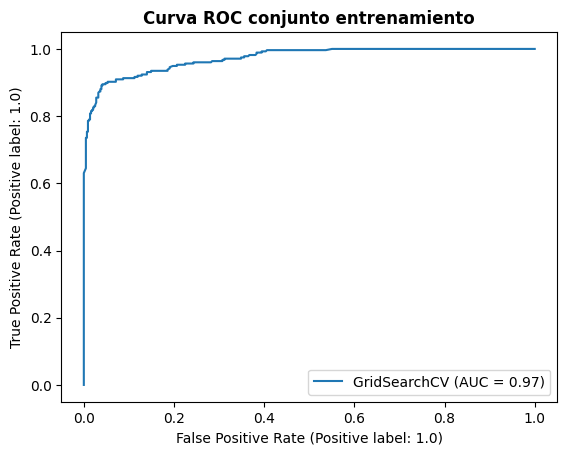

c:\Users\cj_li\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


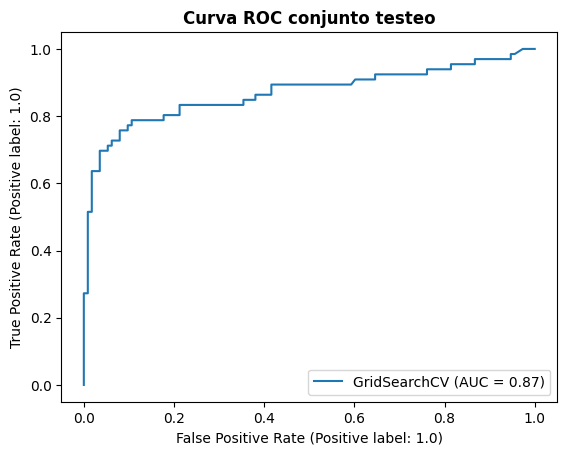

In [232]:
# Se visualiza la curva ROC y el AUC para el conjunto de entrenamiento
plt.figure(figsize=(6,6))
metrics.plot_roc_curve(opt_rf_model, train_X, train_y)
plt.title('Curva ROC conjunto entrenamiento', weight='bold')
plt.show()

# Se visualiza la curva ROC y el AUC para el conjunto de testeo
metrics.plot_roc_curve(opt_rf_model, test_X, test_y)
plt.title('Curva ROC conjunto testeo', weight='bold')
plt.show()

In [108]:
probabs = pd.DataFrame(opt_xgb_grid.predict_proba(test_X)[:,1], columns=["$P$ Clase 1"]) #Probabilidades para ver el punto de corte del modelo XGBoost con búsqueda exhaustiva
probabs['Survived'] = np.array(test_y)

In [109]:
probabs.describe()

,$P$ Clase 1,Survived
count,179.000000,179.000000
mean,0.382128,0.368715
std,0.347226,0.483810
min,0.001548,0.000000
25%,0.074078,0.000000
50%,0.248780,0.000000
75%,0.722328,1.000000
max,0.992960,1.000000


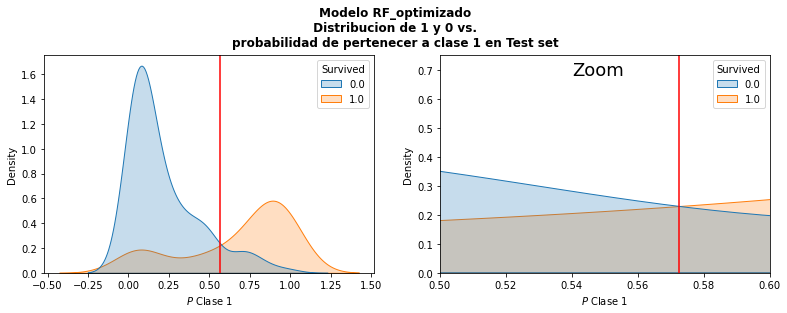

In [113]:
plt.figure(figsize=(13,4))

#plot 1:
plt.subplot(1, 2, 1)
sns.kdeplot(data = probabs, x="$P$ Clase 1", hue='Survived', fill=True)
plt.axvline(0.565, color='red')

#plot 2:
plt.subplot(1, 2, 2)
sns.kdeplot(data = probabs, x="$P$ Clase 1", hue= 'Survived', fill=True)
plt.text(0.54, 0.7, f'Zoom', fontsize = 18, ha="left", va="center")
plt.xlim(0.50, 0.60)
plt.ylim(0.00, 0.75) # (left, right)
plt.axvline(0.5725, color='red')

plt.suptitle("Modelo RF_optimizado\n Distribucion de 1 y 0 vs. \nprobabilidad de pertenecer a clase 1 en Test set", y = 1.05, fontsize = 12, fontweight="bold")

plt.show()

## Hacer las predicciones finales

In [34]:
titanic_test

,Pclass,Age,Fare,Family,Sex,Embarked,Deck
891,0.841916,0.320607,-0.492073,-0.432161,0.743497,-0.606323,0.507835
892,0.841916,1.188265,-0.508104,-0.432161,-1.344995,0.622279,0.507835
893,-0.352091,2.229454,-0.456144,-0.432161,0.743497,-0.606323,0.507835
894,0.841916,-0.199987,-0.475961,-0.432161,0.743497,0.622279,0.507835
895,0.841916,-0.547050,-0.405875,2.313951,-1.344995,0.622279,0.507835
...,...,...,...,...,...,...,...
1304,0.841916,-0.130575,-0.487804,-0.432161,0.743497,0.622279,0.507835
1305,-1.546098,0.632964,1.462041,-0.432161,-1.344995,-1.834926,-1.923608
1306,0.841916,0.598258,-0.503271,-0.432161,0.743497,0.622279,0.507835
1307,0.841916,-0.130575,-0.487804,-0.432161,0.743497,0.622279,0.507835


In [142]:
# Hacer predicciones en el conjunto de prueba con el modelo random forest optimized
y_pred = opt_rf_model.best_estimator_.predict(titanic_test)

In [266]:
# Hacer predicciones en el conjunto de prueba con el modelo ensamblado 1
y_pred = ensemble_titanic_1.predict(titanic_test)

In [35]:
# Hacer predicciones en el conjunto de prueba con el modelo ensamblado 2
y_pred = ensemble_titanic_2.predict(titanic_test)

In [189]:
# Hacer predicciones en el conjunto de prueba con el modelo ensamblado 2
y_pred = ensemble_titanic_3.predict(titanic_test)

In [134]:
# Hacer predicciones en el conjunto de prueba con el modelo XGBoost con hyperopt
y_pred = xgb_hyopt.predict(titanic_test)

In [78]:
# Hacer predicciones en el conjunto de prueba con el modelo XGBoost con hyperopt_2
y_pred = xgboost_bo.predict(titanic_test)

In [190]:
y_pred = pd.DataFrame(y_pred)
columnas = ['Survived']
y_pred.columns = columnas

In [191]:
y_pred.head(10)

,Survived
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0
5,0.0
6,0.0
7,0.0
8,1.0
9,0.0


In [192]:
y_pred.value_counts()

Survived
0.0         275
1.0         143
dtype: int64

In [193]:
id =test_data['PassengerId']

In [194]:
y_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


In [195]:
predic = pd.concat([id, y_pred], axis=1)

In [196]:
predic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.7 KB


In [197]:
predic['Survived'] = predic['Survived'].astype(int)

In [198]:
predic.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [199]:
predic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int32
dtypes: int32(1), int64(1)
memory usage: 5.0 KB


In [200]:
predic.to_csv('submission_CL_10.csv', index=False)

Probar:  
Eliminar Deck, luego aplicar KNN  
Regresión Logística  
Considerar solo variables categóricas  

12.06.2023 El ensamblado_1 obtuvo una puntuación dfe 0.7775 en Kaggle, mejor hasta el momento

19-06-2023  
Tengo la impresión de que los modelos están sobreajustados por la pasada de características del data set de prueba.  
Próximo paso trabajar las muestras 100% por separado

score: 0,81  
https://www.kaggle.com/code/jimmyyeung/titanic-eda-feature-engineering-beginners  

https://www.kaggle.com/code/gunesevitan/titanic-advanced-feature-engineering-tutorial  

score: 0.79  
https://www.kaggle.com/code/jadelhelm/a-short-introduction-to-sklearn-pipelines